In [2]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [3]:
customer_feedback = pd.read_csv("customer_feedback_cleaned.csv")
customer = pd.read_csv("customer_cleaned.csv")
expansion_outcome = pd.read_csv("expansion_outcome_cleaned.csv")
product = pd.read_csv("product_cleaned.csv")
utilization = pd.read_csv("utilization_cleaned.csv")

In [4]:
merged_data = (
    customer
    .merge(customer_feedback, on=["id", "score_date"], how="left")
    .merge(expansion_outcome, on=["id", "score_date"], how="left")
    .merge(product, on=["id", "score_date"], how="left")
    .merge(utilization, on=["id", "score_date"], how="left")
)

In [5]:
merged_data.to_csv("merged_data.csv", index=False)

In [6]:
df=pd.read_csv("merged_data.csv")

In [7]:
display(df.head())
display(df.info())
display(df.describe())

,id,score_date,segment_smb,segment_non_smb,segment_commercial,segment_enterprise,segment_midmarket,region_emea,region_apac,region_latam,...,max_seats,agent_utilization,is_provisioned_any_channel_M_before,max_seats_M_before,agent_utilization_increase,agent_utilization_decrease,seat_utilization,seat_utilization_M_before,seat_utilization_increase,seat_utilization_decrease
0,JMAN_2429072,2023-02-10,1,0,0,0,0,1,0,0,...,2.0,0.500000,2.0,2.0,0,0,1.0,1.0,0,0
1,JMAN_9043466,2023-01-13,0,1,1,0,0,1,0,0,...,9.0,0.111111,9.0,9.0,0,1,1.0,1.0,0,0
2,JMAN_2452556,2023-02-24,0,1,0,0,0,1,0,0,...,1.0,0.000000,1.0,1.0,0,0,1.0,1.0,0,0
3,JMAN_2455113,2023-03-03,0,1,0,0,0,1,0,0,...,1.0,0.000000,1.0,1.0,0,1,1.0,1.0,0,0
4,JMAN_18127937,2023-02-10,0,1,0,0,0,1,0,0,...,5.0,0.000000,0.0,5.0,0,0,0.0,0.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13389 entries, 0 to 13388
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   13389 non-null  object 
 1   score_date                           13389 non-null  object 
 2   segment_smb                          13389 non-null  int64  
 3   segment_non_smb                      13389 non-null  int64  
 4   segment_commercial                   13389 non-null  int64  
 5   segment_enterprise                   13389 non-null  int64  
 6   segment_midmarket                    13389 non-null  int64  
 7   region_emea                          13389 non-null  int64  
 8   region_apac                          13389 non-null  int64  
 9   region_latam                         13389 non-null  int64  
 10  region_amer                          13389 non-null  int64  
 11  customer_age_quarters       

None

,segment_smb,segment_non_smb,segment_commercial,segment_enterprise,segment_midmarket,region_emea,region_apac,region_latam,region_amer,customer_age_quarters,...,max_seats,agent_utilization,is_provisioned_any_channel_M_before,max_seats_M_before,agent_utilization_increase,agent_utilization_decrease,seat_utilization,seat_utilization_M_before,seat_utilization_increase,seat_utilization_decrease
count,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,...,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000
mean,0.228023,0.771977,0.087759,0.041303,0.031593,0.397192,0.161849,0.058780,0.382179,15.181194,...,8.877810,0.148547,7.800956,8.828441,0.048099,0.443648,0.839780,0.838284,0.043693,0.048846
std,0.419573,0.419573,0.282954,0.198997,0.174921,0.489335,0.368326,0.235221,0.485938,3.907299,...,26.401349,0.268514,23.944982,26.158741,0.213984,0.496833,0.322337,0.324812,0.204418,0.215554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.875000,0.875000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,...,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,17.000000,...,8.000000,0.200000,7.000000,8.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,...,500.000000,1.000000,487.000000,500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:

df["seat_utilization_change"] = df["seat_utilization"] - df["seat_utilization_M_before"]
df["nps_change"] = df["nps_score"] - df["nps_score_all_time"]
df["csat_change"] = df["csat_score"] - df["csat_response_rate"]
df["arr_volatility"] = abs(df["current_arr"] - df["future_arr"]) / df["current_arr"]
df["discount_dependency"] = df["discount_arr_usd"] / df["current_arr"]
df["provisioning_complexity"] = df[["is_provisioned_any_channel_M_before"]].sum(axis=1)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

df["churn"] = ((df["future_arr"] < 0.5 * df["current_arr"]) | 
               (df["seat_utilization"] < 0.5 * df["seat_utilization_M_before"])).astype(int)

In [9]:

features = ["seat_utilization_change", "nps_change", "csat_change", "arr_volatility", "discount_dependency", "provisioning_complexity"]
X = df[features]
y = df["churn"]

print("Unique values in target variable y:", y.unique())

Unique values in target variable y: [0 1]


In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [13]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9962658700522778
ROC-AUC Score: 0.9994902491953219
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2543
           1       0.96      0.97      0.96       135

    accuracy                           1.00      2678
   macro avg       0.98      0.98      0.98      2678
weighted avg       1.00      1.00      1.00      2678



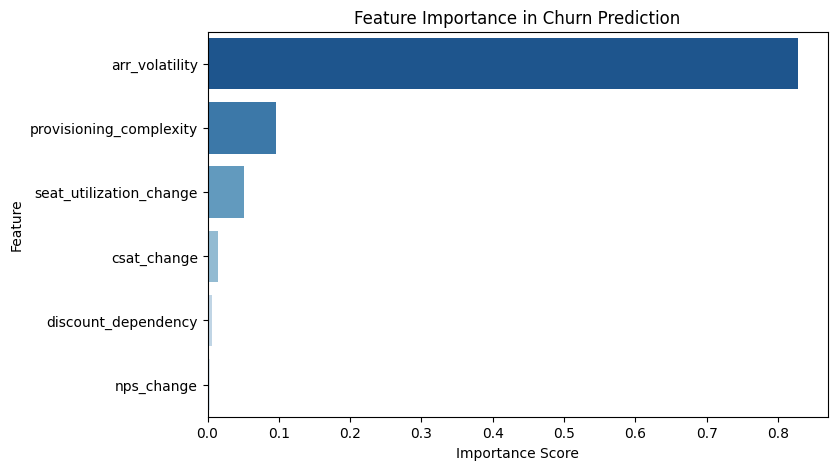

In [15]:

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)


plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="Blues_r")
plt.title("Feature Importance in Churn Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

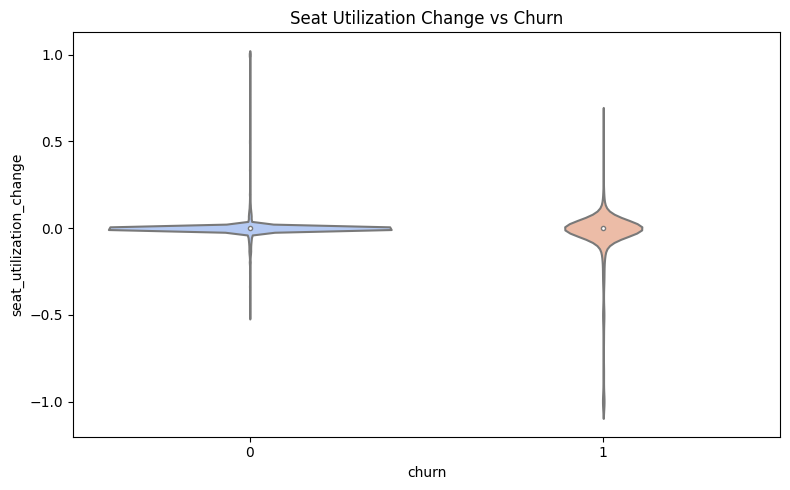

In [16]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df["churn"], y=df["seat_utilization_change"], palette="coolwarm").set(title="Seat Utilization Change vs Churn")
plt.tight_layout()
plt.show()

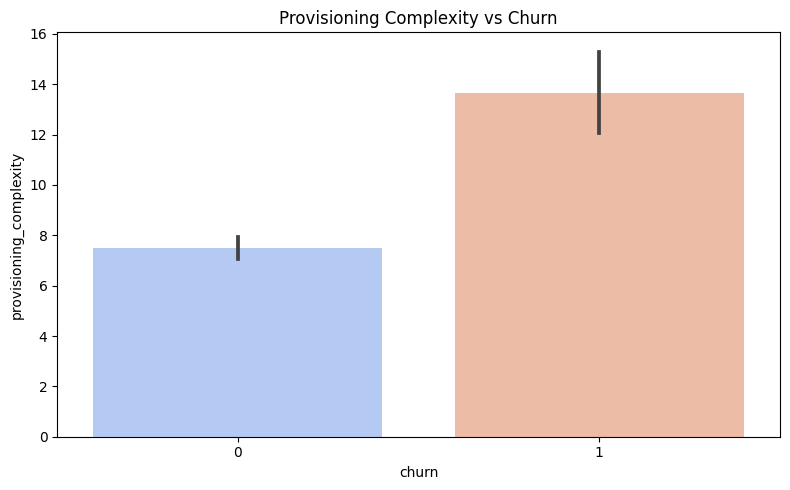

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["churn"], y=df["provisioning_complexity"], palette="coolwarm").set(title="Provisioning Complexity vs Churn")
plt.tight_layout()
plt.show()

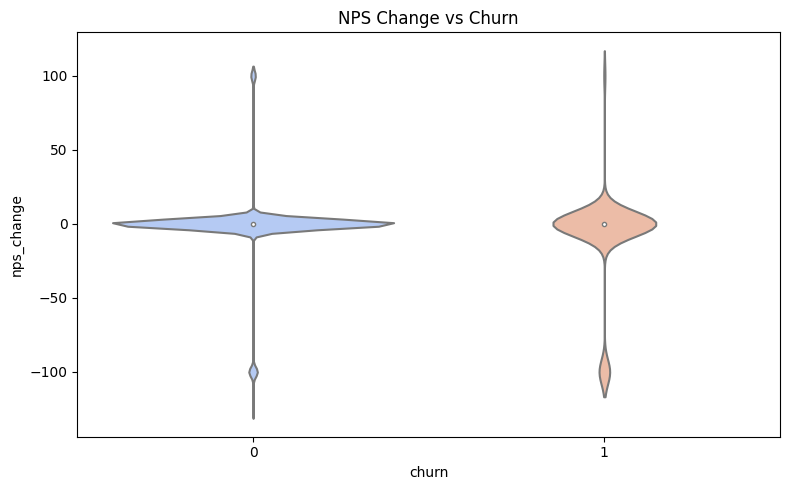

In [18]:

plt.figure(figsize=(8, 5))
sns.violinplot(x=df["churn"], y=df["nps_change"], palette="coolwarm").set(title="NPS Change vs Churn")
plt.tight_layout()
plt.show()

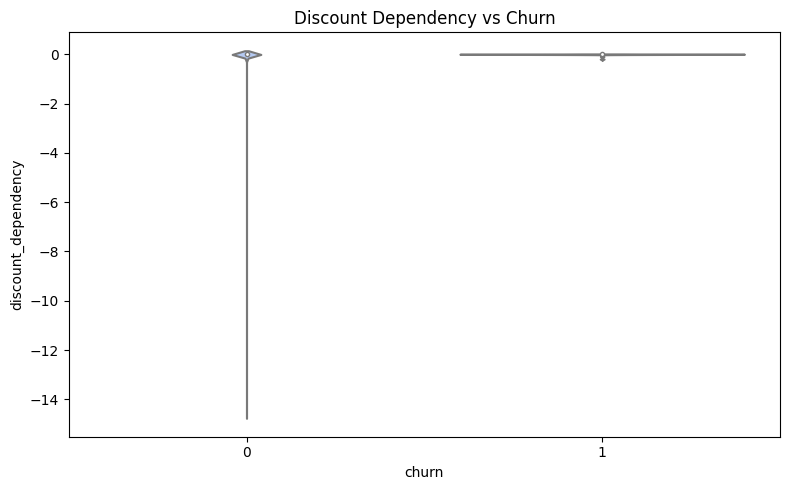

In [19]:

plt.figure(figsize=(8, 5))
sns.violinplot(x=df["churn"], y=df["discount_dependency"], palette="coolwarm").set(title="Discount Dependency vs Churn")
plt.tight_layout()
plt.show()

In [20]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight="balanced"), param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [21]:
best_model = grid_search.best_estimator_
y_pred_opt = best_model.predict(X_test_scaled)
y_prob_opt = best_model.predict_proba(X_test_scaled)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_opt))
print("Optimized ROC-AUC:", roc_auc_score(y_test, y_prob_opt))
print("Classification Report:\n", classification_report(y_test, y_pred_opt))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Accuracy: 0.9929051530993278
Optimized ROC-AUC: 0.9994640334396528
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2543
           1       0.89      0.99      0.93       135

    accuracy                           0.99      2678
   macro avg       0.94      0.99      0.96      2678
weighted avg       0.99      0.99      0.99      2678



In [23]:
import joblib

# Save the result
df.to_csv("resultffff.csv", index=False)

# Save the model
joblib.dump(best_model, "churn_model.pkl")

['churn_model.pkl']